# DELHI ELCTRICITY CONSUMPTION PREDICTOR

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
elec=pd.read_csv("Consumption with date,weather final CSV.csv")

In [3]:
elec.head()
elec=elec.set_index('DATE')
elec

,TIME,temp,rhum,wspd,pres,VALUE
DATE,,,,,,
1/1/2018,12:00:00 AM,6.6,6.6,100.0,0.0,1868.99
1/1/2018,3:00:00 AM,10.0,10.0,100.0,0.0,1424.39
1/1/2018,6:00:00 AM,13.8,12.4,91.0,0.0,1961.04
1/1/2018,9:00:00 AM,19.8,11.0,57.0,0.0,3528.79
1/1/2018,12:00:00 PM,16.4,12.7,79.0,0.0,3793.20
...,...,...,...,...,...,...
31-12-2018,9:00:00 AM,22.0,7.4,39.0,5.4,3974.57
31-12-2018,12:00:00 PM,19.6,8.3,48.0,3.6,4033.06
31-12-2018,3:00:00 PM,10.4,8.0,85.0,0.0,3233.93


In [4]:
elec.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2912 entries, 1/1/2018 to 31-12-2018
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TIME    2912 non-null   object 
 1   temp    2912 non-null   float64
 2   rhum    2912 non-null   float64
 3   wspd    2912 non-null   float64
 4   pres    2912 non-null   float64
 5   VALUE   2912 non-null   float64
dtypes: float64(5), object(1)
memory usage: 159.2+ KB


In [5]:
elec['pres'].value_counts()

pres
0.0       936
3.6       293
7.6       268
5.4       190
9.4       155
         ... 
1003.9      1
1005.8      1
1018.1      1
1019.6      1
51.8        1
Name: count, Length: 310, dtype: int64

In [6]:
elec.describe()

,temp,rhum,wspd,pres,VALUE
count,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000
mean,25.213805,26.735474,55.126511,244.182555,3659.571071
std,8.418097,20.247172,33.157776,426.915899,1167.726512
min,4.200000,4.000000,0.000000,0.000000,1324.520000
25%,19.200000,13.500000,23.000000,0.000000,2874.977500
50%,26.800000,21.300000,62.000000,7.600000,3535.930000
75%,31.400000,27.225000,85.000000,22.300000,4507.440000
max,44.000000,100.000000,100.000000,1024.300000,6923.770000


array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'rhum'}>],
       [<Axes: title={'center': 'wspd'}>,
        <Axes: title={'center': 'pres'}>],
       [<Axes: title={'center': 'VALUE'}>, <Axes: >]], dtype=object)

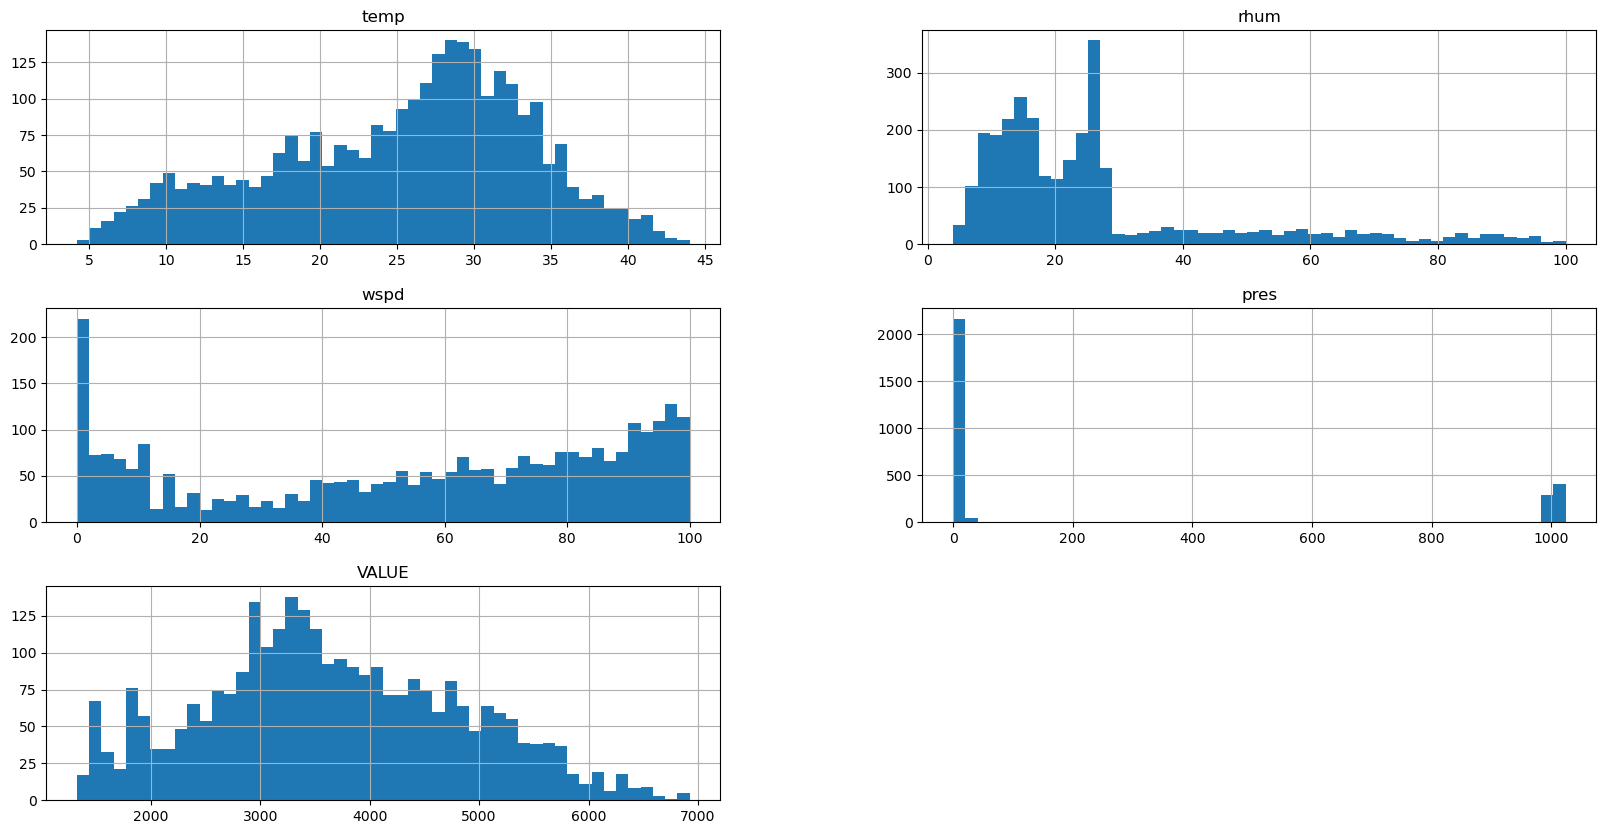

In [7]:
elec.hist(bins=50,figsize=(20,10))

In [8]:
elec.isna().sum()

TIME     0
temp     0
rhum     0
wspd     0
pres     0
VALUE    0
dtype: int64

<Axes: >

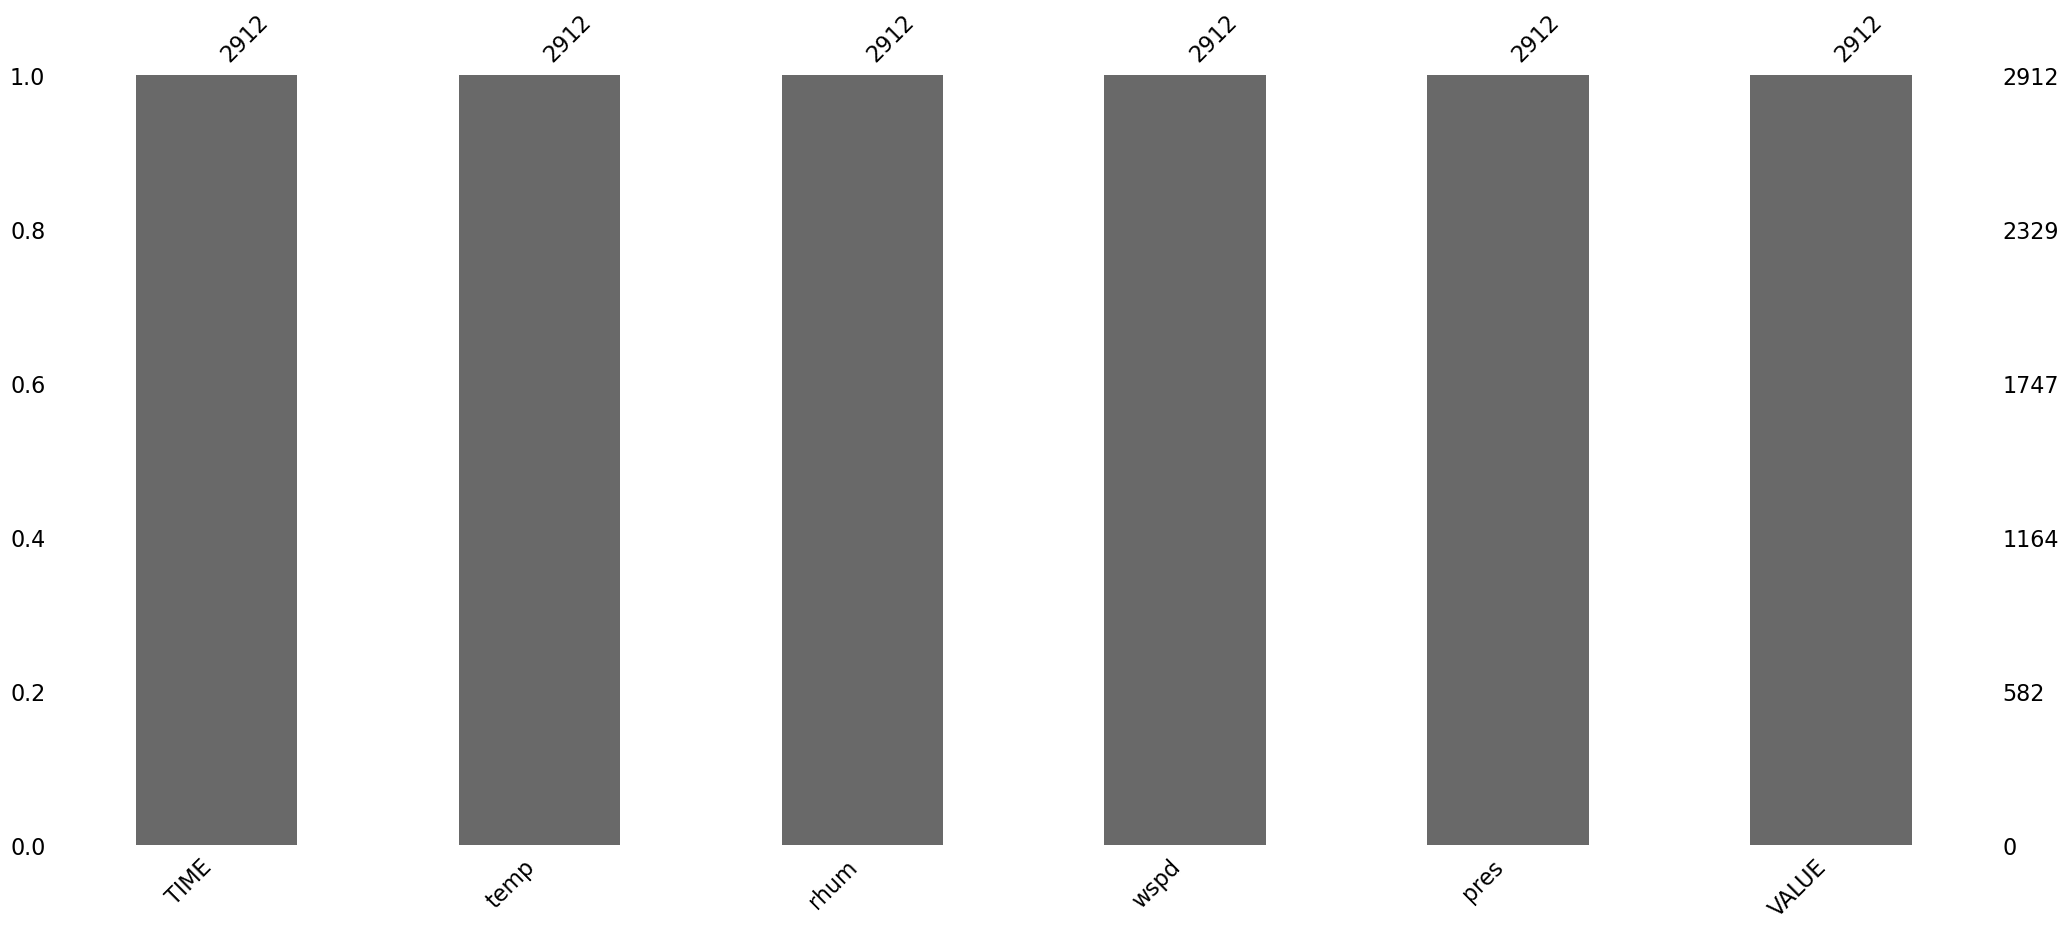

In [9]:
import missingno as msno
msno.bar(elec)

In [10]:
print(elec.head())
print(elec.dtypes)


                 TIME  temp  rhum   wspd  pres    VALUE
DATE                                                   
1/1/2018  12:00:00 AM   6.6   6.6  100.0   0.0  1868.99
1/1/2018   3:00:00 AM  10.0  10.0  100.0   0.0  1424.39
1/1/2018   6:00:00 AM  13.8  12.4   91.0   0.0  1961.04
1/1/2018   9:00:00 AM  19.8  11.0   57.0   0.0  3528.79
1/1/2018  12:00:00 PM  16.4  12.7   79.0   0.0  3793.20
TIME      object
temp     float64
rhum     float64
wspd     float64
pres     float64
VALUE    float64
dtype: object


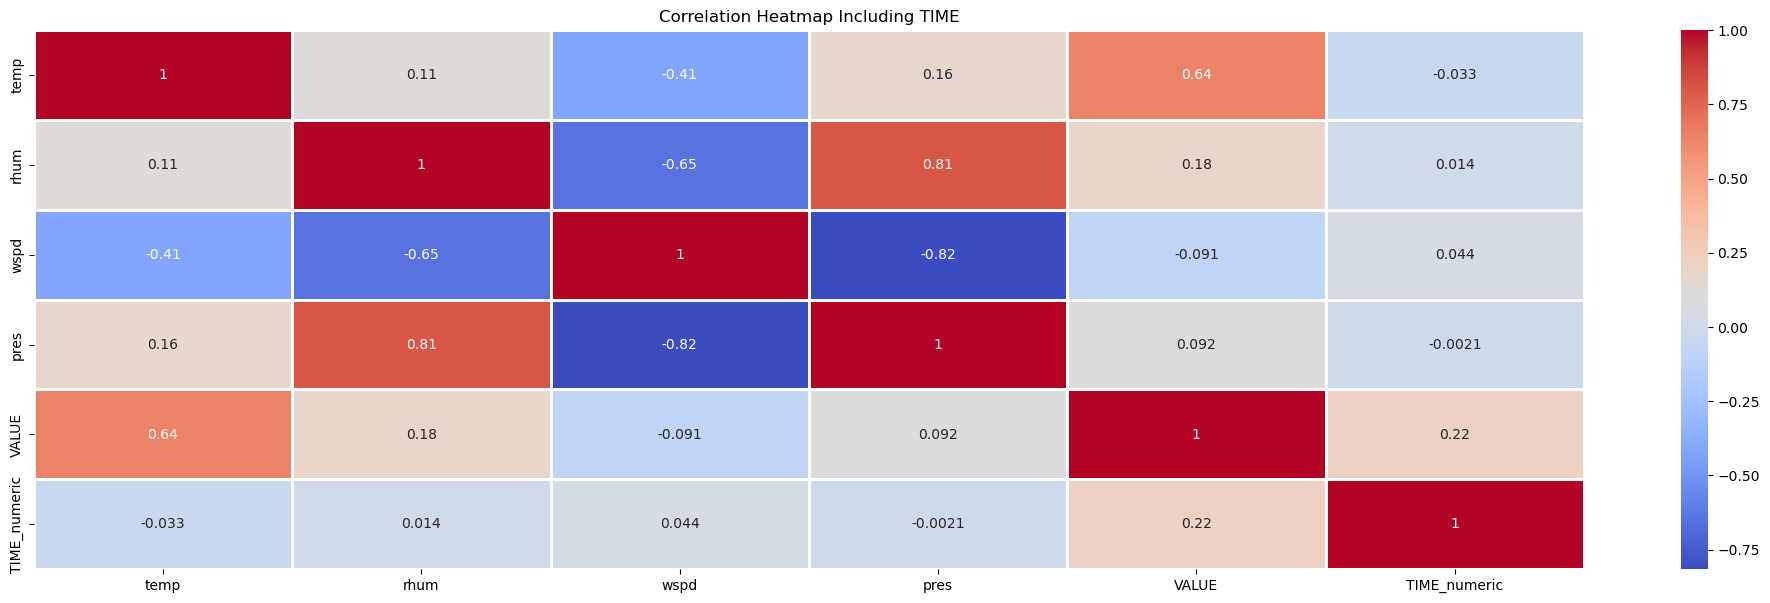

In [11]:
# Create a copy of the DataFrame
elec_copy = elec.copy()

# Convert TIME column to a numeric format in the copy
elec_copy['TIME_numeric'] = pd.to_datetime(elec_copy['TIME'], format='%I:%M:%S %p').dt.hour * 3600 + pd.to_datetime(elec_copy['TIME'], format='%I:%M:%S %p').dt.minute * 60

# Select numeric columns, including the new TIME_numeric column
elec_numeric = elec_copy.select_dtypes(include=[float]).assign(TIME_numeric=elec_copy['TIME_numeric'])

# Plot the heatmap
plt.figure(figsize=(25, 7))  # Create matplotlib figure
sns.heatmap(elec_numeric.corr(), annot=True, linewidths=1, fmt=".2g", cmap='coolwarm') 
plt.xticks(rotation='horizontal')
plt.title('Correlation Heatmap Including TIME')
plt.show()

In [12]:
elec=elec.drop('TIME',axis=1)
elec

,temp,rhum,wspd,pres,VALUE
DATE,,,,,
1/1/2018,6.6,6.6,100.0,0.0,1868.99
1/1/2018,10.0,10.0,100.0,0.0,1424.39
1/1/2018,13.8,12.4,91.0,0.0,1961.04
1/1/2018,19.8,11.0,57.0,0.0,3528.79
1/1/2018,16.4,12.7,79.0,0.0,3793.20
...,...,...,...,...,...
31-12-2018,22.0,7.4,39.0,5.4,3974.57
31-12-2018,19.6,8.3,48.0,3.6,4033.06
31-12-2018,10.4,8.0,85.0,0.0,3233.93


# SPLITTING DATASET INTO TRAINING AND TESTING PART

In [13]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(elec,test_size=0.25,random_state=42)
# print(f"Rows in train set- {(train_set)}\nRows in  test set- {(test_set)}")
print(f"Rows in train set- {len(train_set)}\nRows in  test set- {len(test_set)}")

Rows in train set- 2184
Rows in  test set- 728


In [14]:
elec_cp=elec.copy()
elec_cp.describe()

,temp,rhum,wspd,pres,VALUE
count,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000
mean,25.213805,26.735474,55.126511,244.182555,3659.571071
std,8.418097,20.247172,33.157776,426.915899,1167.726512
min,4.200000,4.000000,0.000000,0.000000,1324.520000
25%,19.200000,13.500000,23.000000,0.000000,2874.977500
50%,26.800000,21.300000,62.000000,7.600000,3535.930000
75%,31.400000,27.225000,85.000000,22.300000,4507.440000
max,44.000000,100.000000,100.000000,1024.300000,6923.770000


In [15]:
elec=train_set.copy()
elec

,temp,rhum,wspd,pres,VALUE
DATE,,,,,
6/10/2018,25.4,18.8,67.0,0.0,4055.93
22-09-2018,27.4,24.5,84.0,14.8,4215.48
13-07-2018,28.4,25.6,85.0,7.6,6031.48
6/9/2018,32.2,23.7,61.0,14.8,3523.65
30-06-2018,28.0,89.0,11.2,999.6,5344.46
...,...,...,...,...,...
25-07-2018,29.2,27.6,91.0,0.0,5039.48
17-05-2018,31.4,17.0,42.0,0.0,4542.40
22-05-2018,40.4,9.7,16.0,9.4,3875.48


# LOOKING FOR CORRELATION AMONG VARIABLES

In [16]:
corr_matrix=elec.corr()

In [17]:
corr_matrix['VALUE'].sort_values(ascending=False)

VALUE    1.000000
temp     0.641467
rhum     0.194763
pres     0.092099
wspd    -0.096824
Name: VALUE, dtype: float64

array([[<Axes: xlabel='VALUE', ylabel='VALUE'>,
        <Axes: xlabel='temp', ylabel='VALUE'>,
        <Axes: xlabel='rhum', ylabel='VALUE'>,
        <Axes: xlabel='pres', ylabel='VALUE'>,
        <Axes: xlabel='wspd', ylabel='VALUE'>],
       [<Axes: xlabel='VALUE', ylabel='temp'>,
        <Axes: xlabel='temp', ylabel='temp'>,
        <Axes: xlabel='rhum', ylabel='temp'>,
        <Axes: xlabel='pres', ylabel='temp'>,
        <Axes: xlabel='wspd', ylabel='temp'>],
       [<Axes: xlabel='VALUE', ylabel='rhum'>,
        <Axes: xlabel='temp', ylabel='rhum'>,
        <Axes: xlabel='rhum', ylabel='rhum'>,
        <Axes: xlabel='pres', ylabel='rhum'>,
        <Axes: xlabel='wspd', ylabel='rhum'>],
       [<Axes: xlabel='VALUE', ylabel='pres'>,
        <Axes: xlabel='temp', ylabel='pres'>,
        <Axes: xlabel='rhum', ylabel='pres'>,
        <Axes: xlabel='pres', ylabel='pres'>,
        <Axes: xlabel='wspd', ylabel='pres'>],
       [<Axes: xlabel='VALUE', ylabel='wspd'>,
        <Axes: xlabe

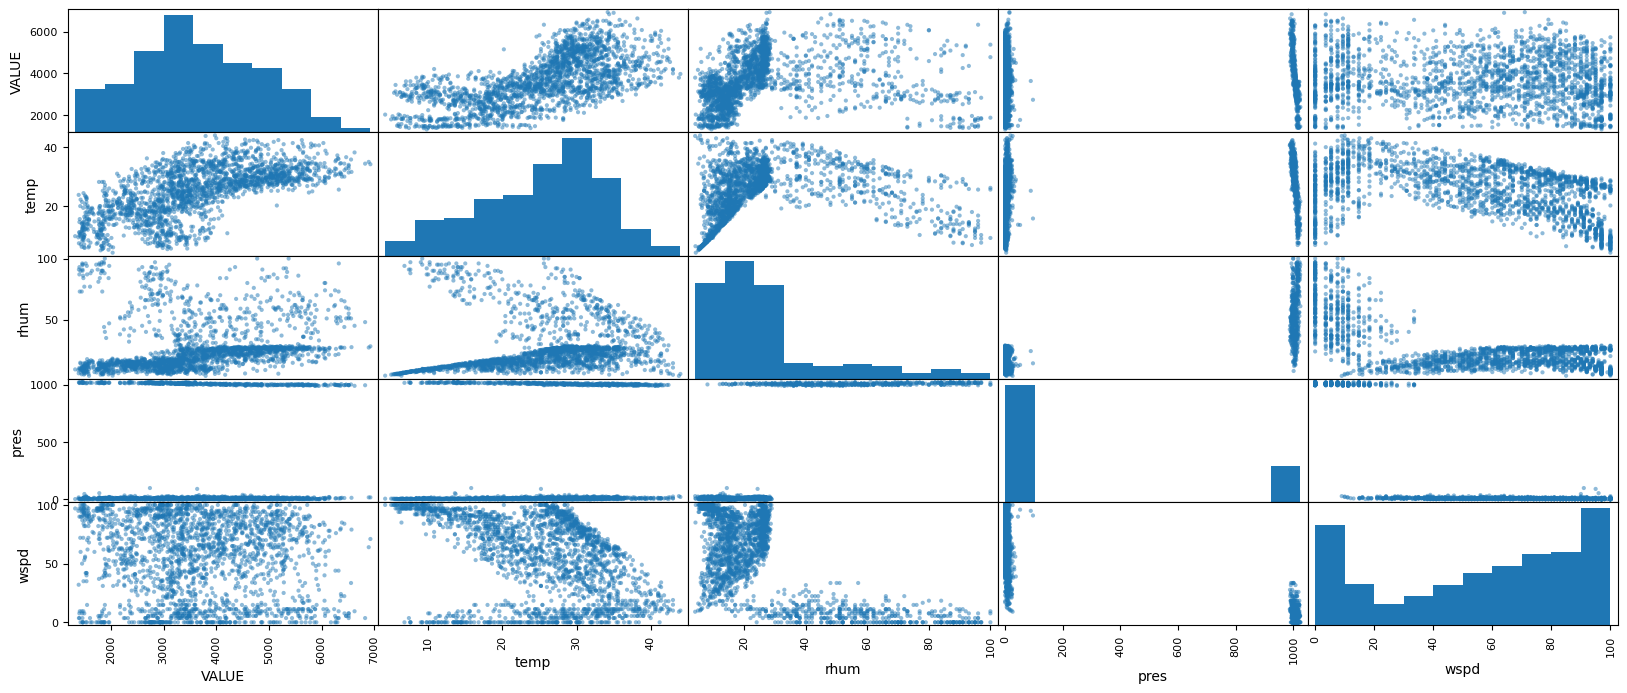

In [18]:
from pandas.plotting import scatter_matrix
attributes=["VALUE","temp","rhum","pres","wspd"]
scatter_matrix(elec[attributes],figsize=(20,8))

<Axes: xlabel='temp', ylabel='VALUE'>

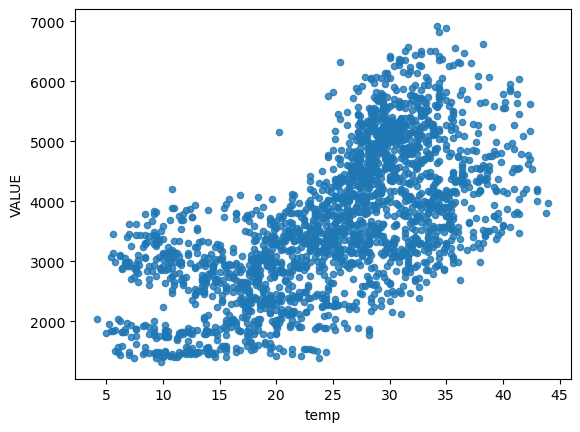

In [19]:
elec.plot(kind="scatter",x="temp",y="VALUE",alpha=0.8)

In [20]:
elec["ppt"]=elec["pres"]/elec["temp"]
# elec_numeric=elec_numeric.drop('TPP',axis=1)
elec = elec.reindex(columns=['temp', 'rhum', 'wspd','pres','ppt','VALUE'])
elec

,temp,rhum,wspd,pres,ppt,VALUE
DATE,,,,,,
6/10/2018,25.4,18.8,67.0,0.0,0.000000,4055.93
22-09-2018,27.4,24.5,84.0,14.8,0.540146,4215.48
13-07-2018,28.4,25.6,85.0,7.6,0.267606,6031.48
6/9/2018,32.2,23.7,61.0,14.8,0.459627,3523.65
30-06-2018,28.0,89.0,11.2,999.6,35.700000,5344.46
...,...,...,...,...,...,...
25-07-2018,29.2,27.6,91.0,0.0,0.000000,5039.48
17-05-2018,31.4,17.0,42.0,0.0,0.000000,4542.40
22-05-2018,40.4,9.7,16.0,9.4,0.232673,3875.48


<Axes: xlabel='ppt', ylabel='VALUE'>

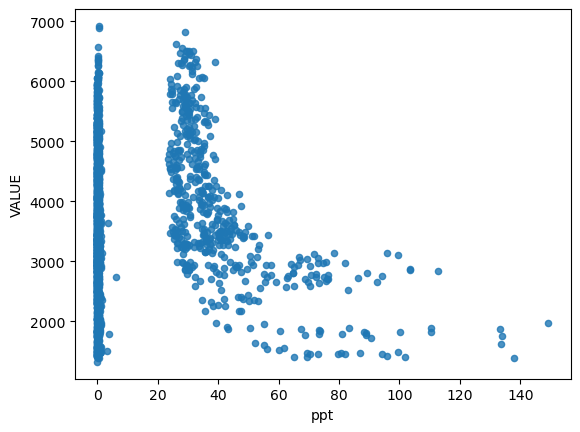

In [21]:
elec.plot(kind="scatter",x="ppt",y="VALUE",alpha=0.8)

In [22]:
elec=train_set.drop("VALUE",axis=1)
elec_labels=train_set["VALUE"].copy()

# IMPUTING/FINDING MISSING VALUES AND REPLACING THEM WITH MEDIAN

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(elec)

SimpleImputer(strategy='median')

In [24]:
imputer.statistics_

array([26.9, 21.1, 62. ,  7.6])

In [25]:
X = imputer.transform(elec)

In [26]:
elec_tr = pd.DataFrame(X, columns=elec.columns)

In [27]:
elec_tr.describe()

,temp,rhum,wspd,pres
count,2184.000000,2184.000000,2184.000000,2184.000000
mean,25.248626,26.467537,55.428663,239.630952
std,8.386585,19.960786,32.886153,424.034001
min,4.200000,4.000000,0.000000,0.000000
25%,19.400000,13.500000,25.000000,0.000000
50%,26.900000,21.100000,62.000000,7.600000
75%,31.400000,27.200000,84.000000,22.300000
max,44.000000,100.000000,100.000000,1024.300000


# CREATING A PIPELINE

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #we can add more pipeline if required
    ('std_scaler',StandardScaler()),
])

In [29]:
elec_num_tr=my_pipeline.fit_transform(elec)

In [30]:
elec_num_tr

array([[ 0.01805363, -0.38421796,  0.35194104, -0.56525144],
       [ 0.25658433, -0.09859267,  0.86899432, -0.53034059],
       [ 0.37584967, -0.043472  ,  0.89940922, -0.54732425],
       ...,
       [ 1.80703386, -0.84021623, -1.19921879, -0.54307833],
       [ 1.21070711,  0.92865618, -1.68585717,  1.77212464],
       [ 1.40153167, -0.47441542, -1.34521031,  1.80255369]])

In [31]:
elec_num_tr.shape

(2184, 4)

# SELECTING A DESIRED MODEL FOR ELECTRICITY PREDICTION

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model=LinearRegression()
# model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(elec_num_tr,elec_labels)

RandomForestRegressor()

In [33]:
some_data=elec.iloc[:100]

In [34]:
some_labels=elec_labels.iloc[:100]

In [35]:
prepared_data=my_pipeline.transform(some_data)

In [36]:
model.predict(prepared_data)

array([3934.1597    , 4304.2676    , 5573.8526    , 3682.9144    ,
       5198.5086    , 3118.0927    , 4500.8642    , 3579.0648    ,
       3446.9549    , 2276.0632    , 3098.2054    , 3457.3641    ,
       5113.8007    , 2360.69773333, 2634.0054    , 2431.59544917,
       2358.7218    , 4579.88111036, 4329.978     , 5390.884     ,
       4385.9423    , 4616.33773333, 3399.53367   , 4103.0544    ,
       5352.5727    , 5095.9923    , 2244.8605    , 5037.7037    ,
       4607.7006    , 2575.65835643, 4563.0488    , 2871.4773    ,
       5330.564715  , 5116.53266667, 4004.6854    , 2927.77144333,
       3397.08946119, 3009.9516    , 2445.3526    , 5383.2067    ,
       1757.4369    , 6158.3286    , 2602.78905857, 2663.1956    ,
       2005.3274    , 3440.6836    , 4241.6832    , 4724.69021333,
       3588.18693333, 4338.01726667, 2601.9072    , 5200.0009    ,
       4269.08592667, 5217.1867    , 2020.50761667, 3985.4969    ,
       5570.0004    , 3295.9702    , 4641.2616    , 2908.1112 

In [37]:
list(some_labels)

[4055.93,
 4215.48,
 6031.48,
 3523.65,
 5344.46,
 3534.99,
 4930.72,
 3542.29,
 3351.3,
 1959.0,
 3148.21,
 3871.6,
 5197.37,
 2114.9,
 2249.07,
 2487.83,
 1886.27,
 4596.16,
 4115.83,
 5161.1,
 4329.01,
 4591.25,
 3378.7,
 4108.5,
 5254.16,
 4923.99,
 1776.25,
 5122.91,
 4730.01,
 2501.5,
 4339.25,
 2946.17,
 5561.36,
 5090.0,
 3946.52,
 2897.34,
 3896.77,
 2990.9,
 2328.45,
 5670.23,
 1496.77,
 6272.19,
 2986.59,
 2620.91,
 1936.81,
 3280.49,
 3885.45,
 4794.41,
 3351.11,
 4372.3,
 2431.29,
 5636.59,
 4422.34,
 5586.69,
 1459.91,
 3960.73,
 5566.19,
 3488.36,
 4886.69,
 2849.69,
 2921.06,
 1449.08,
 4563.52,
 3855.47,
 4644.54,
 3644.92,
 5113.82,
 3349.88,
 4785.0,
 2629.97,
 1497.91,
 3933.6,
 1861.46,
 4638.28,
 3337.21,
 3342.89,
 5278.62,
 3921.09,
 5113.94,
 2972.32,
 2232.98,
 3444.84,
 2812.39,
 4701.5,
 1490.87,
 4295.86,
 5965.33,
 5306.76,
 2120.02,
 3961.22,
 4796.77,
 2629.27,
 2236.86,
 3370.54,
 5047.11,
 3426.82,
 5378.05,
 4505.07,
 2385.64,
 3865.83]

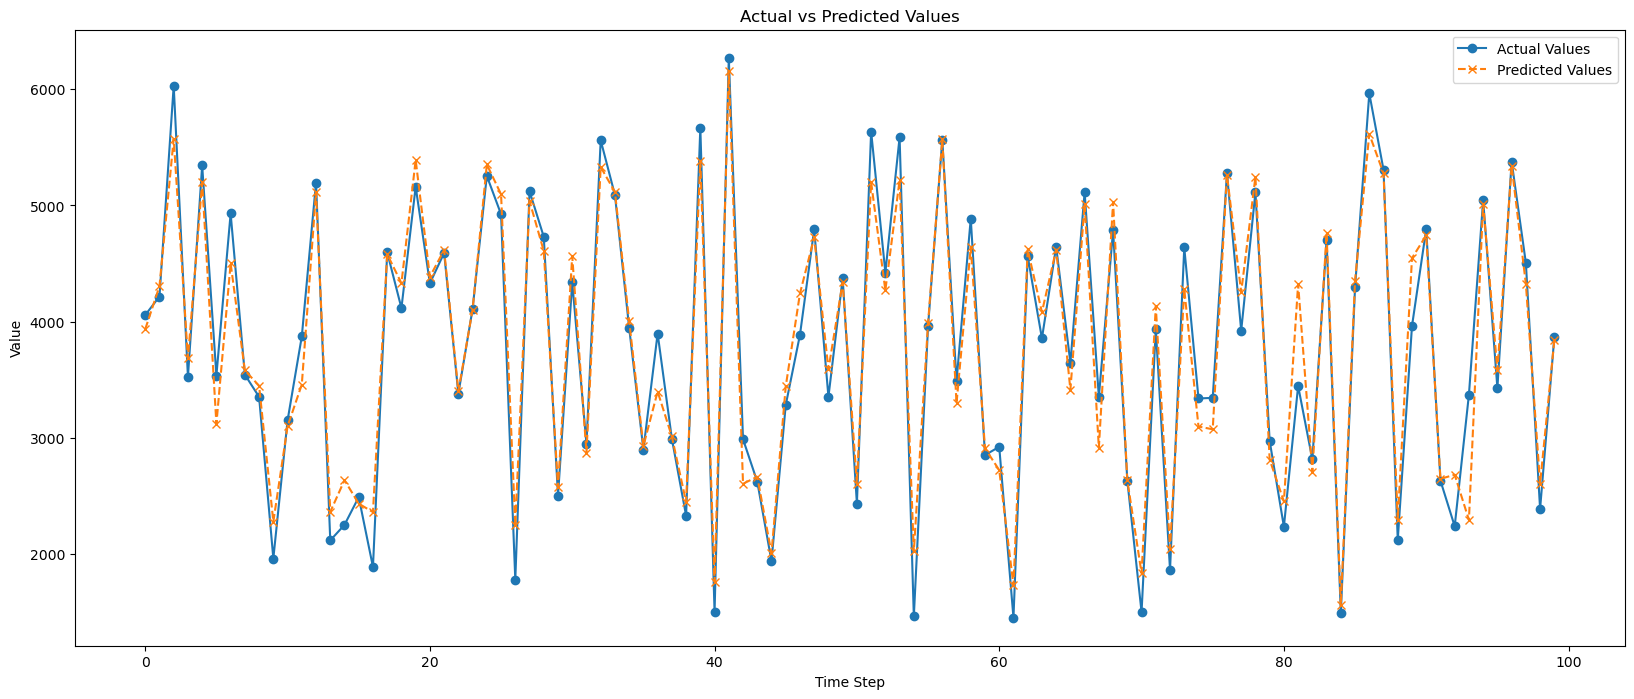

In [38]:
plt.figure(figsize=(20, 8))

# Plot actual values
plt.plot(list(some_labels), label='Actual Values', marker='o')

# Plot predicted values
plt.plot(list(model.predict(prepared_data)), label='Predicted Values', marker='x', linestyle='--')

# Add titles and labels
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Value')

# Add legend
plt.legend()

# Display the plot
plt.show()

# EVALUATING THE MODEL

In [39]:
from sklearn.metrics import mean_squared_error
elec_predictions=model.predict(elec_num_tr)
mse=mean_squared_error(elec_labels,elec_predictions)
rmse=np.sqrt(mse)

In [40]:
rmse

286.34256180247394

In [41]:
# import numpy as np

# Example: Actual and predicted values
actual = elec_labels
predicted =elec_predictions

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((actual - predicted) / actual)) * 100
accuracy = 100 - mape  # Accuracy in percentage

print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 93.01%


# USING BETTER EVALUATION TECHNIQUE-CROSS VALIDATION

In [42]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,elec_num_tr,elec_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [43]:
rmse_scores

array([652.45198148, 726.8629038 , 685.45315837, 689.7454479 ,
       700.63750862, 696.63221987, 646.16374906, 698.42450379,
       638.92592699, 742.40762798])

In [44]:
def print_scores(scores):
    print("scores: ",scores)
    print("Mean: ",scores.mean())
    print("S.D: ",scores.std())

In [45]:
print_scores(rmse_scores)

scores:  [652.45198148 726.8629038  685.45315837 689.7454479  700.63750862
 696.63221987 646.16374906 698.42450379 638.92592699 742.40762798]
Mean:  687.770502785188
S.D:  32.007205209438126


# TESTING THE MODEL

In [46]:
X_test=test_set.drop("VALUE",axis=1)
Y_test=test_set['VALUE'].copy()
X_test_prepared=my_pipeline.transform(X_test)
final_predictions=model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
print(final_rmse)
actual = Y_test
predicted =final_predictions

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((actual - predicted) / actual)) * 100
accuracy = 100 - mape  # Accuracy in percentage

print(f"Accuracy: {accuracy:.2f}%")


678.0919710747238
Accuracy: 82.55%


In [47]:
final_rmse

678.0919710747238

In [48]:
print(final_predictions)

[2696.17020833 3283.248      1925.9023     3397.08946119 4950.5402
 2881.8412     2902.6519     2841.633      4224.55688333 2766.3028
 5460.339      2562.66603333 2966.0741     5151.7265     5591.3694
 3109.9489     5022.6693     4024.40791333 5143.509      5078.531075
 4081.6913     5107.14736667 4725.5066     4621.39614143 4495.7259
 4633.7053     2918.97488333 4526.274      2671.3573     5205.0622
 3020.3039     2399.76743667 4363.43095    5296.3543     4414.23581667
 2649.5923     2865.9447     3025.8621     2894.09812    4108.7808
 4277.485      2561.44835333 4634.5254     4919.9074     3020.69855
 5344.00964667 2307.0398     5115.96968333 2547.70793333 4512.4503
 2694.2437     2940.6778     2994.2265     4620.58031143 3574.2864
 5165.1583     2249.7165944  3085.3727     4510.6463     5327.0007
 3443.969      4647.4811     4179.29175667 5419.4196     3976.5478
 2411.4993     3187.863      4319.946475   3835.45895    4624.4611
 4065.8994     4705.6176     3079.6247     3647.0648   

In [49]:
print(list(Y_test))

[2404.09, 3337.74, 1846.7, 2833.56, 3817.24, 2166.24, 2576.19, 2284.26, 4659.78, 2649.09, 5536.38, 2933.09, 2280.0, 3971.13, 5341.64, 3616.11, 5360.36, 3989.76, 3821.17, 4381.21, 5153.19, 4693.83, 4951.78, 4388.96, 4824.41, 4635.62, 2500.77, 4504.35, 3094.84, 5010.28, 3002.58, 2669.02, 4264.26, 4040.36, 4278.92, 3153.18, 2264.14, 3297.62, 3034.87, 3021.27, 3463.59, 2980.33, 4627.22, 4017.8, 3531.97, 5272.08, 2153.4, 3233.27, 2839.81, 3905.66, 3175.83, 3549.07, 2365.54, 5190.45, 3945.63, 4726.11, 1559.62, 3330.07, 4606.55, 4304.92, 3041.72, 3749.76, 4427.89, 5302.82, 3475.98, 2821.54, 2693.08, 3569.89, 3260.19, 4683.81, 2344.83, 3991.76, 2982.52, 3572.58, 5672.21, 3251.64, 4795.14, 2069.79, 4285.5, 6316.03, 2456.83, 1446.85, 4436.05, 3117.6, 4027.25, 3709.38, 1526.26, 2016.19, 1857.9, 1501.46, 1609.18, 4451.59, 4120.84, 3484.43, 5112.04, 2738.67, 3346.31, 2094.63, 3867.8, 5534.25, 3392.04, 3835.97, 5761.85, 3300.63, 1578.74, 3171.04, 2332.1, 5121.55, 4582.71, 4126.45, 4400.86, 2492.24, 

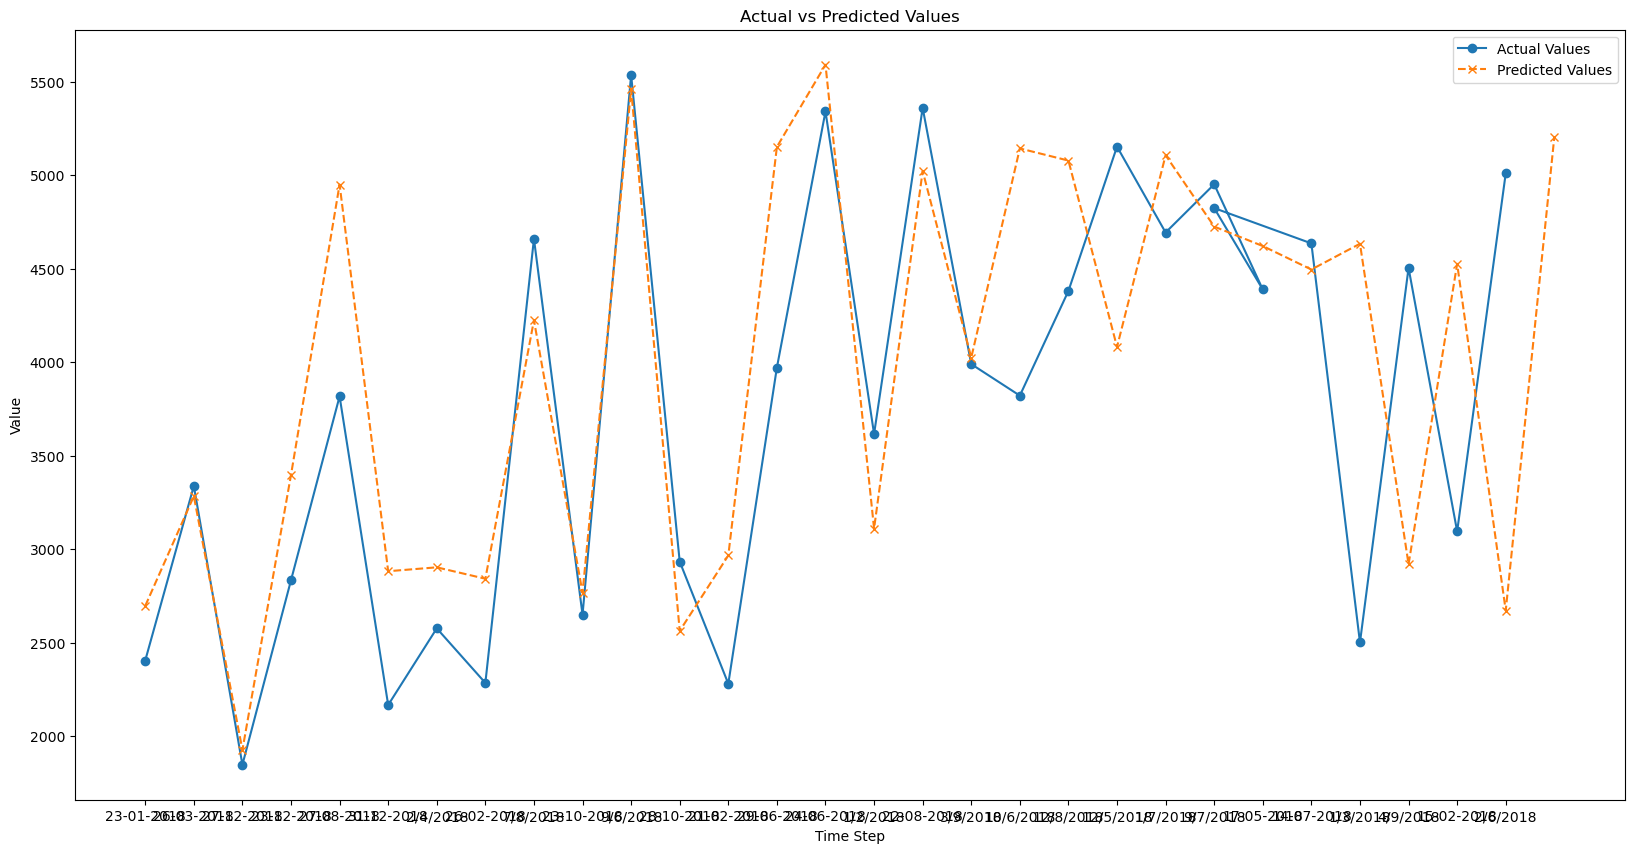

In [50]:
Y_test_sub = Y_test[:30]
final_pred_sub = final_predictions[:30]
# some_labels=elec_labels.iloc[:100]

plt.figure(figsize=(20, 10))

# Plot actual values
plt.plot(Y_test_sub, label='Actual Values', marker='o')

# Plot predicted values
plt.plot(final_pred_sub, label='Predicted Values', marker='x', linestyle='--')

# Add titles and labels
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Value')

# Add legend
plt.legend()

# Display the plot
plt.show()

# SAVING THE MODEL

In [51]:
from joblib import dump,load
dump(model,'DEPP.joblib')

['DEPP.joblib']

In [52]:
prepared_data[:5,:]

array([[ 0.01805363, -0.38421796,  0.35194104, -0.56525144],
       [ 0.25658433, -0.09859267,  0.86899432, -0.53034059],
       [ 0.37584967, -0.043472  ,  0.89940922, -0.54732425],
       [ 0.829058  , -0.13868043,  0.16945165, -0.53034059],
       [ 0.32814353,  3.13348297, -1.34521031,  1.79264656]])